分析结果：
```
    测试和优化方案：
    测试周期：  2013.1~2023.1（10年）
    测试窗口    2年、3年、5年
    滚动窗口    3个月滚动一次，每年4个滚动
    测试数量：  8x4+7x4+5x4= 32+28+20 = 80个测试（ 剩余年数 * 年移动4次）
    
额外测试正负百分位的改变，对结果的影响：[负收益的百分数（买），正收益的百分数（卖）]
    quantiles = [
        [0.2, 0.5], [0.2, 0.6], [0.2, 0.8],
        [0.4, 0.5], [0.4, 0.6], [0.4, 0.8]
    ]
    MA = 480
```

In [20]:
import pandas as pd
df = pd.read_csv("../debug/510310,510500,159915,588090_20130101_20230101_2,3,5_3_quantiles.csv")


In [21]:
print(df.columns)
df.groupby(by=[ '负收益分位数', '正收益分位数'])['组合年化'].mean()


Index(['Unnamed: 0', '基金代码', '基准指数', '投资起始', '投资结束', '定投起始', '定投结束', '期初资金',
       '期末现金', '期末持仓', '期末总值', '组合盈利', '组合收益', '组合年化', '基准收益', '基准年化', '基金收益',
       '基金年化', '夏普比率', '索提诺比率', '卡玛比率', '最大回撤', '买次', '卖次', '成本', '持仓', '现价',
       '佣金', '借钱总额', '借钱次数', '负收益分位数', '正收益分位数', '移动均值'],
      dtype='object')


负收益分位数  正收益分位数
0.2     0.5       0.097896
        0.6       0.102535
        0.8       0.110396
0.4     0.5       0.099571
        0.6       0.104000
        0.8       0.111311
Name: 组合年化, dtype: float64

In [23]:

df1 = df[["基金代码", "投资起始", "投资结束", "组合年化","组合收益","基准收益", "基金收益","负收益分位数","正收益分位数"]]

# 找到[0.2,0.8]这个收益率
df2 = df1[(df1['负收益分位数']==0.2) & (df1['正收益分位数']==0.8)]

# 因为5几只基金的收益数值都一样，所以，求个平均
df3 = df2.groupby(by=['投资起始','投资结束']).mean()

plus = df3[df3['组合收益']>0]
minus = df3[df3['组合收益']<0]
good = df3[df3['组合收益']>df3['基金收益']]
bad = df3[df3['组合收益']<df3['基金收益']]

print(f"一共测试了{len(df3)}个场景")
print(f"平均年化：{df3['组合年化'].mean()}")
print(f"年化方差：{df3['组合年化'].std()}")
print(f"最大年化：{df3['组合年化'].max()}")
print(f"最小年化：{df3['组合年化'].min()}")
print(f"负收益比例：{len(minus)/len(df3)}")
print(f"强于基金比例：{len(good)/len(df3)}")
print("比基金差的情况：")
print(bad)
print("年化为负的情况：")
print(minus)


一共测试了67个场景
平均年化：0.09979041333956085
年化方差：0.10718093907178228
最大年化：0.4240757879845462
最小年化：-0.0632913182893982
负收益比例：0.1791044776119403
强于基金比例：0.8208955223880597
比基金差的情况：
                        基金代码      组合年化      组合收益      基准收益      基金收益  负收益分位数  \
投资起始     投资结束                                                                  
20130104 20171231  393575.00 -0.000938 -0.004681  0.452430  0.978580     0.2   
20130402 20180330  393575.00  0.017961  0.093087  0.422472  0.905960     0.2   
20130702 20180630  393575.00 -0.007654 -0.037689  0.419055  0.590106     0.2   
20131008 20180928  393575.00 -0.015021 -0.072882  0.283483  0.272143     0.2   
20140102 20181231  393575.00 -0.025814 -0.122577  0.182285  0.165828     0.2   
20140402 20190329  393575.00  0.040673  0.220596  0.501105  0.571499     0.2   
20140702 20170630  393575.00  0.007538  0.022786  0.550160  0.551804     0.2   
         20190630  393575.00  0.018945  0.098383  0.446466  0.436988     0.2   
20141008 20170929  393575.00  

In [6]:
pd.read_csv("../debug/510500_20150101_20221201_2,3,5_3.csv")

,Unnamed: 0,基金代码,基准指数,投资起始,投资结束,定投起始,定投结束,期初资金,期末现金,期末持仓,...,卡玛比率,最大回撤,基准收益,基金收益,买次,卖次,成本,持仓,现价,佣金
0,0,510500,sh000001,20150105,20161231,20150703,20160127,200000.0,0.875717,248847.792,...,0.571783,-0.208473,-0.073685,0.210540,21.0,18.0,1.762949,135420.0,1.5180,1101.396283
1,0,510500,sh000001,20150402,20170331,20150703,20160127,200000.0,0.875717,254427.096,...,0.632104,-0.208473,-0.157685,-0.113690,21.0,18.0,1.762949,135420.0,2.1198,1101.396283
2,0,510500,sh000001,20150702,20170630,20150703,20160127,200000.0,0.875717,245123.742,...,0.531373,-0.208473,-0.184100,-0.179688,21.0,18.0,1.762949,135420.0,2.2066,1101.396283


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.10458866, 0.10528397, 0.10597927, 0.10667458, 0.10736989,
        0.10806519, 0.1087605 , 0.10945581, 0.11015111, 0.11084642,
        0.11154173, 0.11223703, 0.11293234, 0.11362764, 0.11432295,
        0.11501826, 0.11571356, 0.11640887, 0.11710418, 0.11779948,
        0.11849479, 0.1191901 , 0.1198854 , 0.12058071, 0.12127602,
        0.12197132, 0.12266663, 0.12336194, 0.12405724, 0.12475255,
        0.12544786]),
 <BarContainer object of 30 artists>)

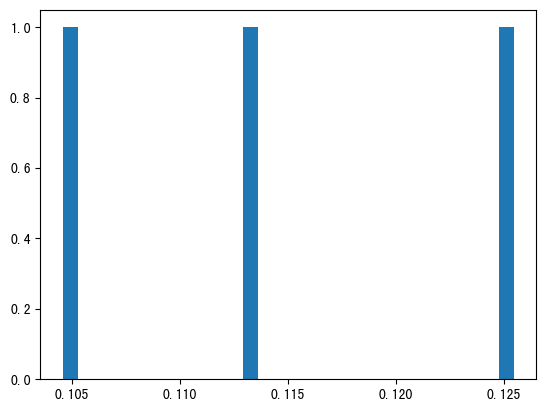

In [2]:
import matplotlib.pyplot as plt
plt.hist(df1['组合年化'],bins=30)